In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [ ]:
data=pd.read_csv('/content/dataset.csv')

In [ ]:
data.head()

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold_On            4000 non-null   int64 
 1   Size               4000 non-null   int64 
 2   Ingredients_Cost   4000 non-null   int64 
 3   Design_Complexity  4000 non-null   object
 4   Time_Taken         4000 non-null   int64 
 5   Price              4000 non-null   int64 
 6   Amount             4000 non-null   int64 
 7   Gender             4000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 250.1+ KB


In [ ]:
data.describe()

,Ingredients_Cost,Time_Taken,Price,Amount
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,111.552500,4.683000,154.680750,5.455000
std,57.863428,2.830285,76.282079,2.871591
min,10.000000,1.000000,14.000000,1.000000
25%,62.000000,2.750000,90.000000,3.000000
50%,113.000000,4.000000,154.000000,5.000000
75%,162.000000,6.000000,217.000000,8.000000
max,210.000000,11.000000,329.000000,10.000000


In [ ]:
df=pd.DataFrame(data)
corr=df.corr()
corr

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
Sold_On,1.000000,-0.017103,0.012850,0.007567,0.005982,0.013823,0.003742,0.008706
Size,-0.017103,1.000000,-0.000097,-0.003815,-0.013760,0.001968,0.002199,0.004668
Ingredients_Cost,0.012850,-0.000097,1.000000,0.012865,-0.012022,0.976499,-0.023004,0.000775
Design_Complexity,0.007567,-0.003815,0.012865,1.000000,-0.594264,-0.118308,0.004922,0.004959
Time_Taken,0.005982,-0.013760,-0.012022,-0.594264,1.000000,0.121084,0.001198,-0.015035
Price,0.013823,0.001968,0.976499,-0.118308,0.121084,1.000000,-0.019290,-0.007720
Amount,0.003742,0.002199,-0.023004,0.004922,0.001198,-0.019290,1.000000,0.042015
Gender,0.008706,0.004668,0.000775,0.004959,-0.015035,-0.007720,0.042015,1.000000


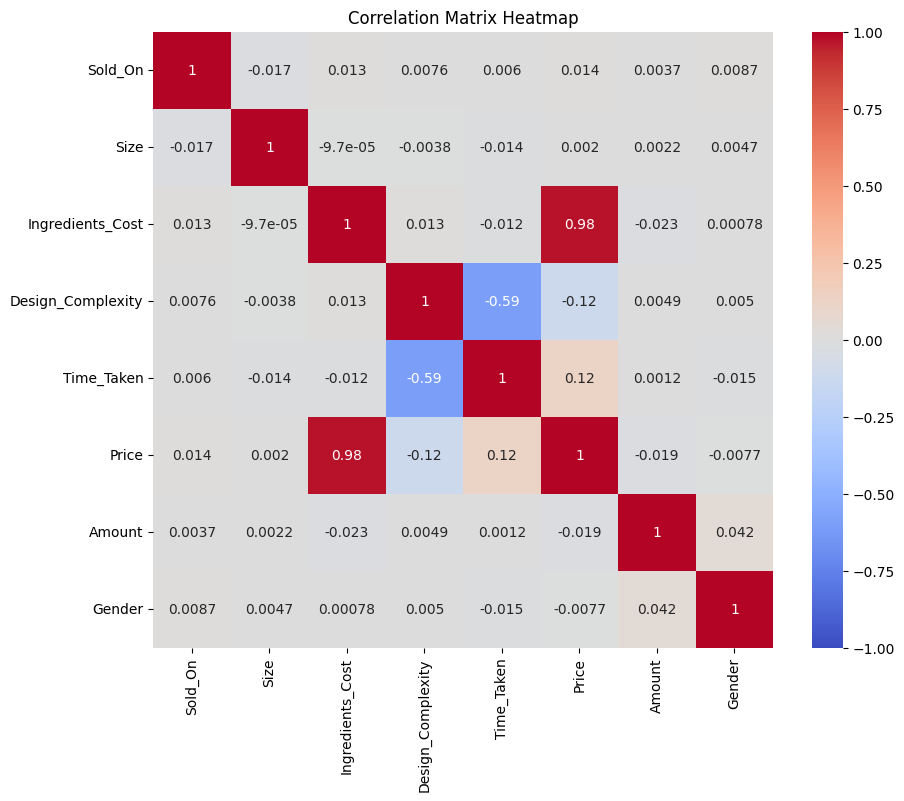

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
le =LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Sold_On']=le.fit_transform(data['Sold_On'])
data['Size']=le.fit_transform(data['Size'])
data['Design_Complexity']=le.fit_transform(data['Design_Complexity'])

In [ ]:
X=data.drop('Price',axis=1)
y=data['Price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
x_train_prediction=model.predict(X_train)
training_data_accuracy=r2_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9750985713388575


In [ ]:
x_test_prediction=model.predict(X_test)
test_data_accuracy=r2_score(x_test_prediction,y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.9732523194105765
